# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [88]:
import pandas as pd

import matplotlib.pyplot as plt 

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple

In [38]:
apple = pd.read_csv(url)
apple.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


In [39]:
apple.shape

(8465, 7)

### Step 4.  Check out the type of the columns

In [40]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [41]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


In [42]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [43]:
apple.set_index('Date', inplace=True)
apple.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 7.  Is there any duplicate dates?

In [44]:
apple.shape

(8465, 6)

In [45]:
apple.index.nunique()

8465

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [53]:
apple.sort_index(inplace=True)
apple.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 9. Get the last business day of each month

In [67]:
apple.asfreq('BM').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44


### Step 10.  What is the difference in days between the first day and the oldest

In [72]:
(apple.index.max() - apple.index.min()).days

12261

In [79]:
# Alternative way
pd.Timedelta(apple.index.max() - apple.index.min(), unit='days').days

12261

### Step 11.  How many months in the data we have?

In [418]:
apple.resample('BM').sum().shape[0]

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [421]:
import matplotlib.dates as mdates

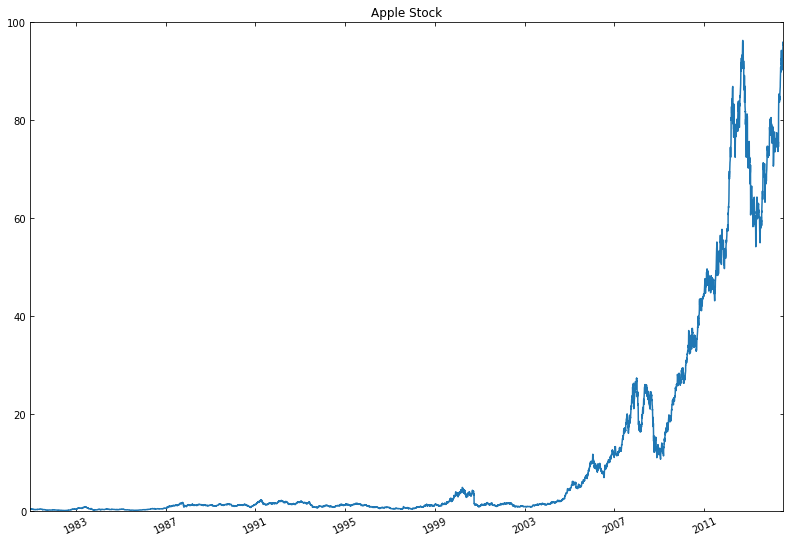

In [490]:
fig, ax = plt.subplots(figsize=(13.5, 9))
ax.plot(apple['Adj Close']);
ax.set_title('Apple Stock')

ax.tick_params(direction='in', top=True, right=True)
ax.get_xaxis().set_tick_params(labelrotation=25)

ax.set_ylim(0, 100)

ax.set_xticks(ax.get_xticks() - 365)
ax.set_xlim(apple.index.min(), apple.index.max())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'));

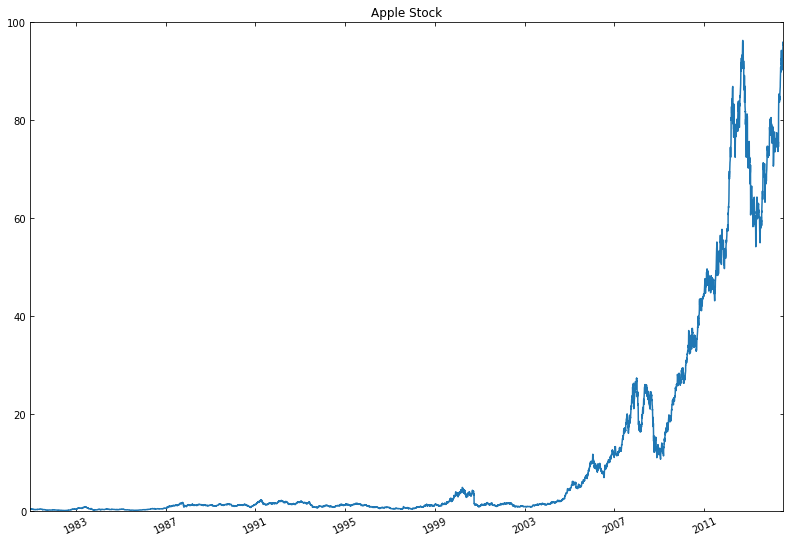

In [486]:
fig, ax = plt.subplots(figsize=(13.5, 9))
ax.plot(apple['Adj Close']);

ax.set_title('Apple Stock')

ax.tick_params(direction='in', top=True, right=True);
ax.get_xaxis().set_tick_params(labelrotation=25);

ax.set_ylim(0, 100);

locator = mdates.AutoDateLocator(maxticks=11, interval_multiples=False)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlim(apple.index.min(), apple.index.max());

### BONUS: Create your own question and answer it.

In [408]:
import plotly.graph_objects as go

In [412]:
fig = go.Figure(data=go.Scatter(x=apple.index, y=apple['Adj Close'], mode='lines'))
fig.show()

In [492]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [543]:
from plotly.subplots import make_subplots

fig = go.Figure()
fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Scatter(
        name='Adj Close',
        x=apple.index, 
        y=apple['Adj Close'], 
        mode='lines'
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        name='Volume',
        x=apple.index, 
        y=apple['Volume'],
    ),
    row=2, col=1
)